Spam Message Classification 

1)Data Preprocessing 

In [1]:
# import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("spam.tsv",sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
#not a balanced data set 
df["label"].value_counts()/(len(df))

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
ham= df[df['label']=='ham']
spam= df[df['label']=='spam']

In [15]:
print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [17]:
ham = ham.sample(spam.shape[0])

In [18]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [20]:
data = ham.append(spam,ignore_index=True)

In [21]:
data.shape

(1494, 4)

In [22]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

In [23]:
data.head()

,label,message,length,punct
0,ham,I wonder if your phone battery went dead ? I h...,77,2
1,ham,Can you plz tell me the ans. BSLVYL sent via f...,58,2
2,ham,I can make lasagna for you... vodka...,38,6
3,ham,"My planning usually stops at ""find hella weed,...",64,3
4,ham,I have lost 10 kilos as of today!,33,1


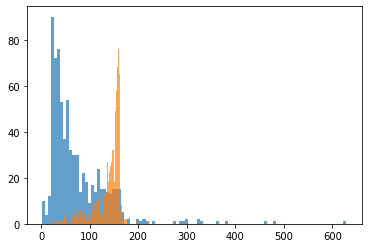

In [29]:
# plot the histogram
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

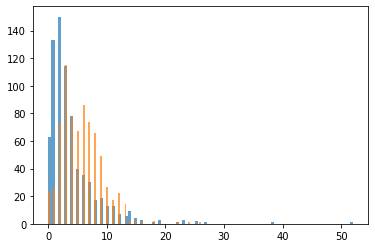

In [30]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

Building the Model(Random Forest)


In [32]:
# segregate the data into test and train
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size = 0.3, random_state=0,shuffle= True)

In [34]:
1494*0.3

448.2

In [35]:
x_train.shape

(1045,)

In [36]:
x_test.shape

(449,)

In [39]:
# encoding text to vector
# using tF-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [43]:
classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=100))])

In [44]:
classifier.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
# Predicting the results (Random Forest)

In [45]:
y_pred = classifier.predict(x_test)

In [ ]:
y_test,y_pred

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.9443207126948775

In [50]:
0.9443207126948775*449

424.0

In [51]:
confusion_matrix (y_test,y_pred)

array([[222,   5],
       [ 20, 202]])

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.98      0.95       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



Building SVM model

In [54]:
from sklearn.svm import SVC

In [55]:
svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])

In [57]:
svm.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ov

In [58]:
# predicting the SVM 

y_pred =  svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9465478841870824

In [59]:
confusion_matrix(y_test,y_pred)

array([[219,   8],
       [ 16, 206]])

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.96      0.95       227
        spam       0.96      0.93      0.94       222

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [61]:
test1=["Hello,You are learning natural language processing"]
test2= ["Hope you are doing good and learning new things!"]
test3= ['congratulations,you won a lottery ticket worth $1Million ! To calim call on 446677']

In [62]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [63]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
